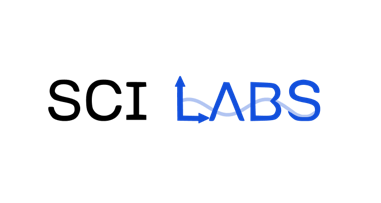

# Dráha lietadla

Cieľom tohto merania je pomocou reálnych dát polohy a rýchlosti pristávajúceho lietadla precvičiť tipy pohybov (rovnomerný, zrýchlený...) a vzťahy medzi priebehom zrýchlenia, rýchlosti a polohy. Ukážeme si, ako sa dá z grafov rýchloist odhadnúť prejdená vzdialenosť na základe geometrických úvah a časť záujemcov si môže vyskúšat základy numerickej integrácie.





In [ ]:
# nacitanie kniznic
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Nasleduje načítanie dát do veličín:
- *t* - čas od začiatku merania v jednotke [min]
- *ground_speed* - horizontálna rýchlosť v jednotke [km/h], meraná zo senzorov lietadla (meranie je prerušené v momente pristátia)
- *vertical_speed* - vertikálna rýchlosť v jednotke [km/h], meraná zo senzorov lietadla (meranie je prerušené v momente pristátia)
- *x* - x-ová GPS súradnica polohy v jednotke [m]
- *y* - y-ová GPS súradnica polohy v jednotke [m]
- *z* - z-ová GPS súradnica polohy v jednotke [m]
- *v_x* - rýchlosť v smere x v jednotke [km/h], dopočítané z GPS polohy
- *v_y* - rýchlosť v smere y v jednotke [km/h], dopočítané z GPS polohy
- *v_xy* - rýchlosť v smere z v jednotke [km/h], dopočítané z GPS polohy


In [ ]:
data = np.loadtxt('landing.txt', delimiter=',', skiprows=1)

t = (data[:,0]-data[:,0][0]) / 60 # cas [min]
ground_speed = data[:,6]*1.852 # horizontalna rychlost [km/h], merana zo senzorov lietadla
vertical_speed = data[:,8]*0.304 # vertikalna rychlost [m/min], merana zo senzorov lietadla

x = data[:,15] - data[:,15][0] # x-ova suradnica poloha [m]
y = data[:,16] - data[:,16][0] # y-ova suradnica poloha [m]
z = data[:,17]- data[:,17][-1] # vyska nad povrchom [m]
v_x = np.convolve(data[:,18] * 3.6,mode='same',v=np.ones(15)/15) # rychlost v smere x [km/h], dopocitana z GPS polohy
v_y = np.convolve(data[:,19] * 3.6,mode='same',v=np.ones(15)/15) # rychlost v smere y [km/h], dopocitana z GPS polohy
v_xy = np.sqrt(v_x**2 + v_y**2) # velkost rychlosti [km/h]

Pomocou dát je možné vykresliť 3D trajektóriu pristávajúceho lietadla. Graf je interaktívny, je možné nim otáčať a a približovať. Farebne je vyobrazená časová závislosť pristávania.

In [ ]:
trace = go.Scatter3d(x=x, y=y, z=z,
                     mode='lines+markers',
                     marker=dict(size=5, color=t, colorscale='rdbu', colorbar=dict(title='Time [min]')),
)

fig = go.Figure(data=[trace])

# layout updates
fig.update_layout(scene=dict(
                    xaxis_title='x [m]',
                    yaxis_title='y [m]',
                    zaxis_title='z [m]'),
                  title='Trajektória pristávajúceho lietadla',
                  width=900,  # sirka vizualizacie
                  height=700)  # vyska vizualizacie

fig.show()

Z dát môžme vykresliť základné závislosti opisujúce pohyb lietadla.

Výška nad povrchom

Text(0, 0.5, 'z [m]')

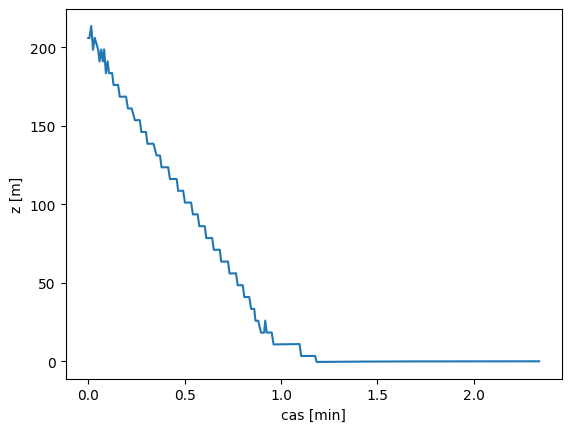

In [ ]:
plt.plot(t,z)
plt.xlabel('cas [min]')
plt.ylabel('z [m]')

Trajektória v horizontálnej rovine a prejdená horizontálna vzdialenosť

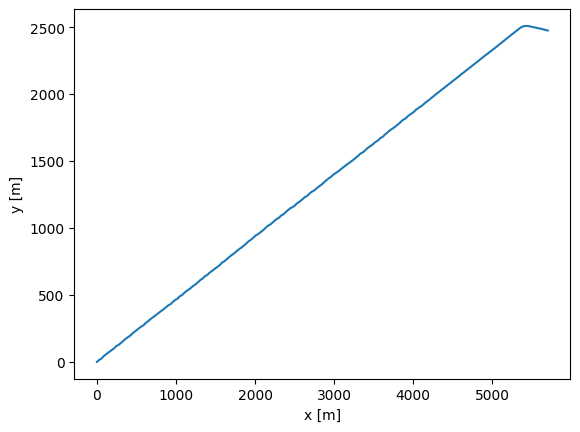

Text(0, 0.5, 'poloha [m]')

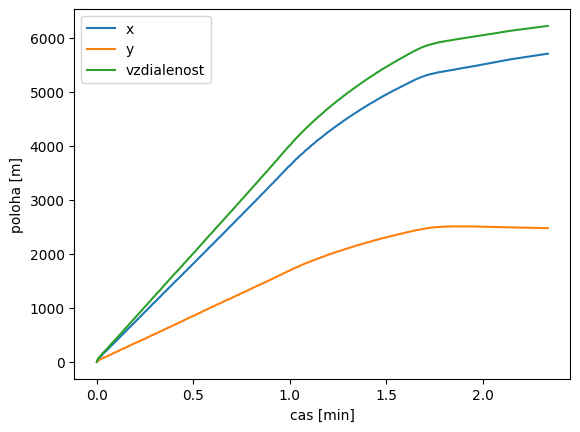

In [ ]:
plt.plot(x,y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,np.sqrt(x**2+y**2),label='vzdialenost')
plt.legend()
plt.xlabel('cas [min]')
plt.ylabel('poloha [m]')


Horizontálna rýchlosť (ground speed)

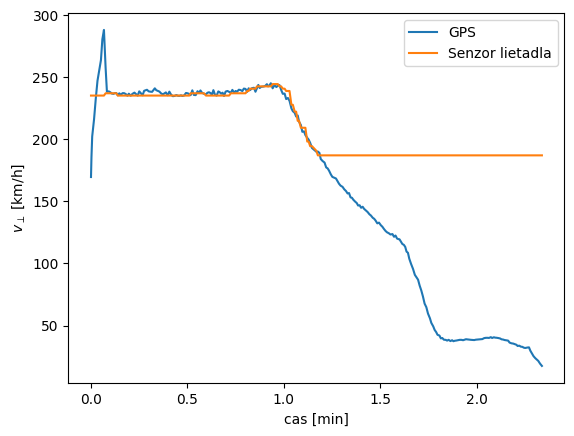

In [ ]:
plt.plot(t,v_xy,label='GPS')
plt.plot(t,ground_speed,label='Senzor lietadla')
plt.xlabel('cas [min]')
plt.ylabel('$v_{\perp}$ [km/h]')
plt.legend()

Vertikálna rýchlosť

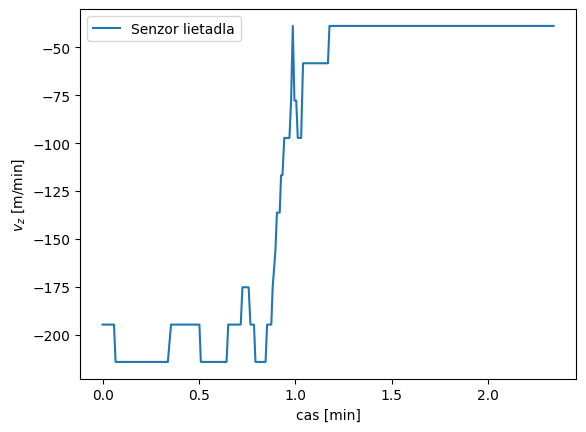

In [ ]:
plt.plot(t,vertical_speed,label='Senzor lietadla')
plt.xlabel('cas [min]')
plt.ylabel('$v_z$ [m/min]')
plt.legend()

**Numerická integrácia - rýchlokurz**

Na jednoduchom príklade si ukážeme, ako získať graf priebehu polohy z dát rýchllsti lietadla. Začneme jedndoduchým príkladom - spočítanie obsahu trojuholníka.

Na začiatok si vygenerujeme dáta, ktoré budú odpovedaťtrojuholníku.

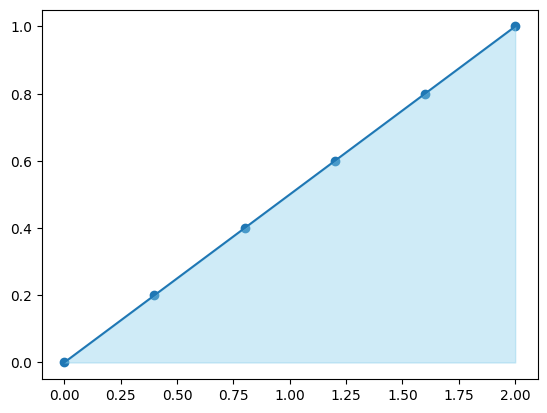

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,6) # vytvorenie x-ovych hodnot. 6 bodov rovnomerne rozprestretych medzi 0 a 2
y = 0.5 * x
plt.plot(x,y)
plt.scatter(x,y)

# Vyplnenie plochy pod grafom
plt.fill_between(x, y,  color='skyblue', alpha=0.4)


Pravouhlý trojuholník má rozmery prepôn 2 a 1, čo znamená že modro zafarbená plocha má obsah 1.

My však budeme počítať obsah zjednodušenou schémou vysvetlenou v texte k úlohe, ktorá počíta obsahy obdlžníkov pod plochou. Namiesto skutočného trojuholníka bude nami počítaná plocha vyzerať takto

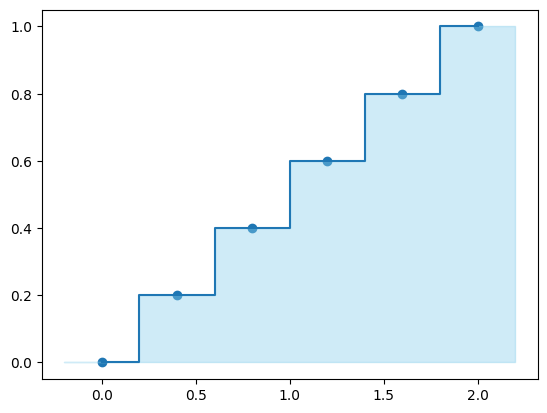

In [ ]:
plt.step(x,y,where = 'mid')
plt.scatter(x,y)

# Vytvorenie bodov pre schodíkový graf pre vyplnenie plochy
x_fill = np.repeat(x, 2)[1:] - (x[1]-x[0])/2
y_fill = np.repeat(y, 2)[:-1]

x_fill = np.append(x_fill, 2.2)
y_fill = np.append(y_fill, y[-1])

# Vyplnenie plochy pod grafom
plt.fill_between(x_fill, y_fill, step='mid', color='skyblue', alpha=0.4)


Ručne vieme spočítať obsah trojuholníkov nasledovne

In [ ]:
delta_x = x[1] - x[0] # spocitanie sirky obdlznicka odcitanim druhej a prvej hodnoty v nasom zozname pre hodnoty x

print('Sirka obdlznicka je '+str(delta_x))

# Obsah pod prvym obdlznikom
s0 = delta_x * y[0]
print('Obsah pod prvym obdlznikomje '+str(s0))

# Obsah pod druhym obdlznikom
s1 = delta_x * y[1]
print('Obsah pod druhym obdlznikomje '+str(s1))

# Obsah pod tretim obdlznikom
s2 = delta_x * y[2]
print('Obsah pod tretim obdlznikomje '+str(s2))

# Obsah pod stvrtym obdlznikom
s3 = delta_x * y[3]
print('Obsah pod stvrtym obdlznikomje '+str(s3))

# Obsah pod piatym obdlznikom
s4 = delta_x * y[4]
print('Obsah pod piatym obdlznikomje '+str(s4))

# Obsah pod siestym obdlznikom
s5 = delta_x * y[5]
print('Obsah pod siestym obdlznikomje '+str(s5))

# Celkovy obsah
s = s0 + s1 + s2 + s3 + s4 + s5
print('Priblizny obsah pod plochou je '+str(s))

Sirka obdlznicka je 0.4
Obsah pod prvym obdlznikomje 0.0
Obsah pod druhym obdlznikomje 0.08000000000000002
Obsah pod tretim obdlznikomje 0.16000000000000003
Obsah pod stvrtym obdlznikomje 0.24000000000000005
Obsah pod piatym obdlznikomje 0.32000000000000006
Obsah pod siestym obdlznikomje 0.4
Priblizny obsah pod plochou je 1.2000000000000002


Vidíme, že namiesto očakávaného obsahu 1 sme získali číslo 1.2. To bolo spôsobené tým, že z prvého a posledného trojuholníka musíme započítať iba polovicu, keďže presahujú za okraj pôvodného trojuholníka. Oprava vyzerá takto.

In [ ]:
delta_x = x[1] - x[0] # spocitanie sirky obdlznicka odcitanim druhej a prvej hodnoty v nasom zozname pre hodnoty x

print('Sirka obdlznicka je '+str(delta_x))

# Obsah pod prvym obdlznikom
s0 = delta_x * y[0] / 2
print('Obsah pod prvym obdlznikomje '+str(s0))

# Obsah pod druhym obdlznikom
s1 = delta_x * y[1]
print('Obsah pod druhym obdlznikomje '+str(s1))

# Obsah pod tretim obdlznikom
s2 = delta_x * y[2]
print('Obsah pod tretim obdlznikomje '+str(s2))

# Obsah pod stvrtym obdlznikom
s3 = delta_x * y[3]
print('Obsah pod stvrtym obdlznikomje '+str(s3))

# Obsah pod piatym obdlznikom
s4 = delta_x * y[4]
print('Obsah pod piatym obdlznikomje '+str(s4))

# Obsah pod siestym obdlznikom
s5 = delta_x * y[5] / 2
print('Obsah pod siestym obdlznikomje '+str(s5))

# Celkovy obsah
s = s0 + s1 + s2 + s3 + s4 + s5
print('Priblizny obsah pod plochou je '+str(s))

Sirka obdlznicka je 0.4
Obsah pod prvym obdlznikomje 0.0
Obsah pod druhym obdlznikomje 0.08000000000000002
Obsah pod tretim obdlznikomje 0.16000000000000003
Obsah pod stvrtym obdlznikomje 0.24000000000000005
Obsah pod piatym obdlznikomje 0.32000000000000006
Obsah pod siestym obdlznikomje 0.2
Priblizny obsah pod plochou je 1.0000000000000002


Tentokrát sme sa už dostali k správnemu výsledku. Aby sme nemuseli počítať všetko ručne, je možné použiť takzvaný for cyklus, ktorý prejde cez všetky obdĺžničky automaticky. Najprv počítame polovicu obsahu prvého obdlžníku, potom posledného a následne pomocou cyklu for spočítame zvyšok. Každý medzivýsledok pripočítavame k celkovej sume nazvanej sum.

In [ ]:
sum = 0

sum = sum + delta_x * y[0] / 2 # zapocitanie do suctu prvy obdlznika
sum = sum + delta_x * y[-1] / 2 # zapocitanie do suctu posledny obdlznik
for y_value in y[1:-1]: #definovanie cyklu, ktory prejde cez vsetky prvy vektoru y, okrem prveho a posledneho
    sum = sum + delta_x * y_value

print('Priblizny obsah pod plochou je '+str(s))

Priblizny obsah pod plochou je 1.0000000000000002


Rovnakú logiku vieme použiť na spočítanie obsahu pod grafom rýchlosti lietadla. Môžme tak ziskať hodnotu prejdenej vzdialenosti v danom čase, iba z grafu priebehu rýchlosti, bez potreby vzorčekov. Takáto možnosť je v praxi mnohokrát jediná možnosť, ako spočítať polohu, pretože priebeh rýchlosti je komplikovaný a nedá sa vyjadriť vzorčekom alebo jednoduchým geometrickým tvarom.

Pokúsme sa zanalyzovať priebeh horizontálnej rýchlosti lietadla po dobu prvej 1.2 nminúty. Opäť budeme počítať plochu pod grafom vyznačenú farebne.

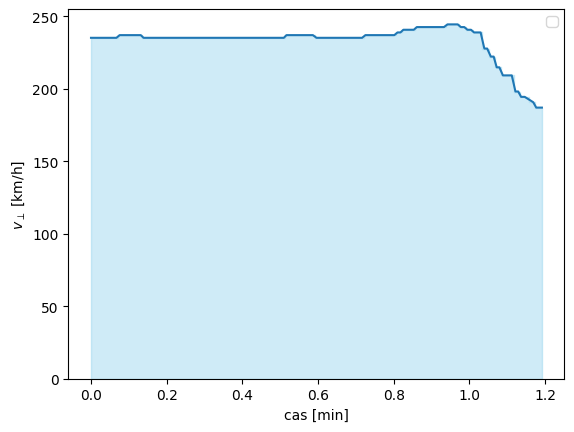

In [ ]:
idx = np.argmin(np.abs(1.2-t))

new_t = t[0:idx]
new_ground_speed = ground_speed[0:idx]

plt.plot(new_t,new_ground_speed)
plt.fill_between(new_t,new_ground_speed, step='mid', color='skyblue', alpha=0.4)
plt.ylim(0,255)

plt.xlabel('cas [min]')
plt.ylabel('$v_{\perp}$ [km/h]')
plt.legend()

Všimnite si, že na výpočet plochy používame tie isté riadky kódu, ako na vypočítanie plochy trojuholníka. Na začiatku priradíme premennej x_int hodnoty času premenené na hodiny a premennej y_int priradíme hodnoty rýchlosti. Funkcia append() nám iba ukladá spočítané hodnoty, čo nám dovolí vykresliť priebeh prejdenej vzdialenosti v čase.

In [ ]:
sum = 0
res = []

x_int = new_t / 60
y_int = new_ground_speed
delta_x = x_int[1]- x_int[0]

sum = sum + delta_x * y_int[0] / 2 # zapocitanie do suctu prvy obdlznika
res.append(sum)

for y_value in y_int[1:-1]: #definovanie cyklu, ktory prejde cez vsetky prvy vektoru y, okrem prveho a posledneho
    sum = sum + delta_x * y_value
    res.append(sum)

sum = sum + delta_x * y_int[-1] / 2 # zapocitanie do suctu posledny obdlznik
res.append(sum)

print('Celkova prejdena vzdialenost je '+str(res[-1]))

Celkova prejdena vzdialenost je 1.3163462104034418


Teraz môžme porovnať prejdenú vzdialenosť získanú z GPS (vykresľovali sme ju vyššie) a vzdialenosť spočítanú z dát rýchlosti lietadla.

Text(0, 0.5, 'poloha [km]')

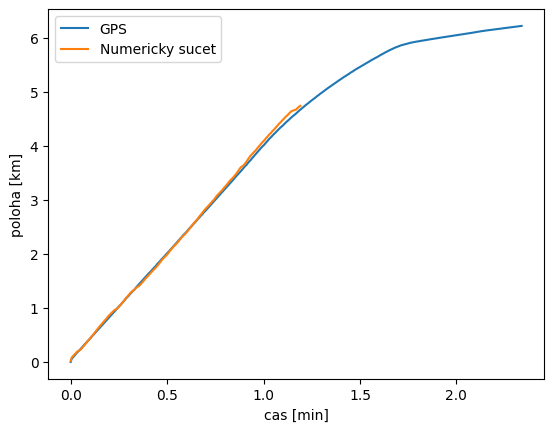

In [ ]:
plt.plot(t,np.sqrt(x**2+y**2)/1000,label='GPS')
plt.plot(x_int*60,np.array(res)*3.6, label = 'Numericky sucet')
plt.legend()
plt.xlabel('cas [min]')
plt.ylabel('poloha [km]')
